# 图像翻译（Image Translation） 之 pix2pix

在 MMGeneration中调用 Image Translation 预训练模型

> 作者：[同济子豪兄](https://space.bilibili.com/1900783)、杨逸飞 2022-4-10

## 进入MMGeneration主目录

In [1]:
import os
os.chdir('mmgeneration')
os.listdir()

['.git',
 '.dev_scripts',
 '.github',
 '.gitignore',
 '.pre-commit-config.yaml',
 '.pylintrc',
 '.readthedocs.yml',
 'CITATION.cff',
 'LICENSE',
 'LICENSES.md',
 'MANIFEST.in',
 'README.md',
 'README_zh-CN.md',
 'apps',
 'configs',
 'demo',
 'docker',
 'docs',
 'mmgen',
 'model-index.yml',
 'requirements.txt',
 'requirements',
 'setup.cfg',
 'setup.py',
 'tests',
 'tools',
 'mmgen.egg-info',
 'outputs',
 'data',
 'checkpoints',
 'work_dirs',
 '.ipynb_checkpoints']

## MMGeneration 支持的 pix2pix 模型

https://github.com/open-mmlab/mmgeneration/tree/master/configs/pix2pix

## 命令行方式调用

In [32]:
!python demo/translation_demo.py -h

usage: translation_demo.py [-h] [--target-domain TARGET_DOMAIN]
                           [--save-path SAVE_PATH] [--device DEVICE]
                           [--sample-cfg SAMPLE_CFG [SAMPLE_CFG ...]]
                           config checkpoint image_path

Translation demo

positional arguments:
  config                test config file path
  checkpoint            checkpoint file
  image_path            Image file path

optional arguments:
  -h, --help            show this help message and exit
  --target-domain TARGET_DOMAIN
                        Desired image domain
  --save-path SAVE_PATH
                        path to save translation sample
  --device DEVICE       CUDA device id
  --sample-cfg SAMPLE_CFG [SAMPLE_CFG ...]
                        Other customized kwargs for sampling function


命令行基本语法：

### pix2pix 设计涂鸦转建筑立面图

In [2]:
!python demo/translation_demo.py \
        configs/pix2pix/pix2pix_vanilla_unet_bn_facades_b1x1_80k.py \
        https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth \
        tests/data/paired/test/3.jpg \
        --save-path outputs/E/E1_facades.jpg \
        --device cuda:0

load checkpoint from http path: https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth


### pix2pix 线描转鞋画

In [3]:
!python demo/translation_demo.py \
        configs/pix2pix/pix2pix_vanilla_unet_bn_wo_jitter_flip_edges2shoes_b1x4_190k.py \
        https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth \
        tests/data/paired/test/3.jpg \
        --save-path outputs/E/E2_shoes.jpg \
        --device cuda:0

load checkpoint from http path: https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth
Traceback (most recent call last):
  File "demo/translation_demo.py", line 60, in <module>
    main()
  File "demo/translation_demo.py", line 45, in main
    args.config, checkpoint=args.checkpoint, device=args.device)
  File "/home/featurize/work/MMGeneration教程/0505/mmgeneration/mmgen/apis/inference.py", line 39, in init_model
    load_checkpoint(model, checkpoint, map_location='cpu')
  File "/environment/miniconda3/lib/python3.7/site-packages/mmcv/runner/checkpoint.py", line 581, in load_checkpoint
    checkpoint = _load_checkpoint(filename, map_location, logger)
  File "/environment/miniconda3/lib/python3.7/site-packages/mmcv/runner/checkpoint.py", line 520, in _load_checkpoint
    return CheckpointLoader.load_checkpoint(filename, map_location, logger)
  File "/environment/miniconda3/lib/python3.7

如果报错`_pickle.UnpicklingError: invalid load key, '<'.`，说明 checkpoints 权重文件没有下载完整，可手动下载`https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth`至 checkpoints 目录

再运行下面的代码块

In [5]:
!python demo/translation_demo.py \
        configs/pix2pix/pix2pix_vanilla_unet_bn_wo_jitter_flip_edges2shoes_b1x4_190k.py \
        checkpoints/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth \
        tests/data/paired/test/33_AB.jpg \
        --save-path outputs/E/E2_shoes.jpg \
        --device cuda:0

load checkpoint from local path: checkpoints/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth


## Python API 方式调用

### 导入工具包

In [19]:
# 导入mmcv和mmgeneration
import mmcv
from mmgen.apis import init_model, sample_img2img_model

import cv2

# 导入numpy和matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 载入预训练 pix2pix 模型

注意，`config_file`和`checkpoint_file`需要对应。

In [9]:
# # 线描转鞋画

# # 指定config文件路径
# config_file = 'configs/pix2pix/pix2pix_vanilla_unet_bn_wo_jitter_flip_edges2shoes_b1x4_190k.py'

# # 指定预训练模型权重文件路径
# checkpoint_file = 'https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_wo_jitter_flip_1x4_186840_edges2shoes_convert-bgr_20210902_170902-0c828552.pth'

In [10]:
# 设计涂鸦转建筑立面图

# 指定config文件路径
config_file = 'configs/pix2pix/pix2pix_vanilla_unet_bn_facades_b1x1_80k.py'

# 指定预训练模型权重文件路径
checkpoint_file = 'https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth'

img_size = 256

### 初始化模型

In [11]:
model = init_model(config_file, checkpoint_file, device='cuda:0')

load checkpoint from http path: https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth


### 生成图像

调用`sample_img2img_model`函数，指定模型和输入图像


In [12]:
# 指定输入图像
image_path = 'tests/data/paired/test/3.jpg'

In [13]:
fake_imgs = sample_img2img_model(model, image_path, target_domain='photo')

In [14]:
fake_imgs.shape

torch.Size([1, 3, 256, 256])

### 展示单张生成的图像

In [15]:
# 将torch张量转为numpy的array
fake_imgs = fake_imgs.numpy()

In [16]:
fake_imgs.shape

(1, 3, 256, 256)

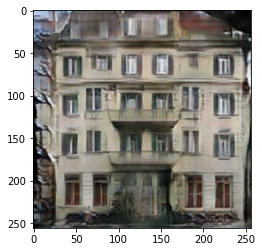

In [21]:
# 选择要展示的图片索引号
index = 0

# 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
RGB = np.zeros((img_size,img_size,3))
RGB[:,:,0] = fake_imgs[index][2]
RGB[:,:,1] = fake_imgs[index][1]
RGB[:,:,2] = fake_imgs[index][0]

RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
RGB = RGB.astype('uint8')

plt.imshow(RGB)
plt.show()